Para garantir a correta sequência dos resultados esperados em cada seção, criou-se o método `get_arguments` para obter argumentos ao executar o script `main.py`. Desta maneira, é possível executar o script mostrando somente o primeiro gráfico, por exemplo, caso esteja no início da seção.

# 1 Agrupamento 

Nesta parte do trabalho, usa-se o algoritmo chamado de *K-means* para agrupar dados semelhantes. Como é um algoritmo de aprendizado não-supervisionado, não há exemplos de dados rotulados, assim como ocorreu nos exemplos de regressão linear (regressão) e regressão logística (classificação) no trabalho 1.

## 1.1 Implementando *K-means*

O *K-means* é um algoritmo iterativo que define os centróides iniciais de cada grupo, realoca esses grupos, e recalcula os centroídes com base nas novas definições de grupo.  Centróide diz-se o ponto que é a média de todos os objetos no grupo. Esse algoritmo é mais detalhado nas próximas seções.

## 1.2 Encontrando centróides mais próximos

A primeira parte é implementar a função `find_closest_centroids`, que retorna os índices dos centroídes mais próximos ao exemplo correspondente da matriz de entrada $X$. Esse função pode ser construída usando *loops* para percorrer todos os exemplos de treinamento e toda *array* de centroídes. No entanto, é possível obter uma implementação computacionalmente mais eficiente através das técnicas de vetorização e [*broadcasting*](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) da biblioteca Numpy. Utiliza-se *broadcasting* para operar sobre matrizes que possuem dimensões não correspondentes. 

Outro aspecto dessa implementação é a utilização do distância Euclidiana quadrada ([*Euclidean Squared Distance*](http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/Clustering_Parameters/Euclidean_and_Euclidean_Squared_Distance_Metrics.htm)) entre os pontos da matriz $X$ e os centróides atuais para formação dos grupos. Os agrupamentos planos (*flat clustering*) não são afetados pela aplicação dessa distância ao invés da distância Euclidiana tradicional, e ainda torna a implementação mais rápida para grandes volumes de dados, devido à redução de uma operação matemática (não executa a raíz quadrada). 

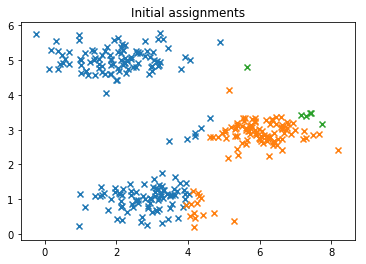

Cluster assignments for the first, second and third examples: [0 2 1]
Centroids after the 1st update:
[[3 3]
 [6 2]
 [8 5]]


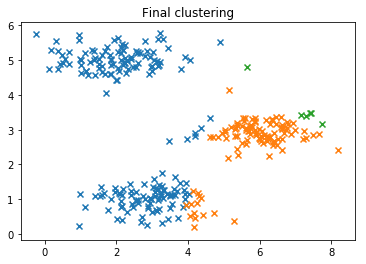

In [1]:
%matplotlib inline
%run Parte1/main.py --only-find-centroid True

A saída conforme esperado é $[0, 2, 1]$ e isso significa que os três primeiros pontos estão em grupos distintos. Logo, o primeiro exemplo está associado (mais próximo) ao primeiro centróide, o segundo exemplo ao terceiro centróide, e o terceiro exemplo ao segundo centróide.  

## 1.3 Atualização dos centróides

A segunda etapa da implementação do *K-means* é atualizar o valor dos centróides com base na formação dos grupos realizada na etapa anterior. Com isso, o valor de cada centróide é recalculado como sendo a média dos pontos que foram atribuídos a ele. Esse cálculo está implementado na função `compute_centroids`, onde aplica-se [*list comprehensions*](https://docs.python.org/3.6/tutorial/datastructures.html#list-comprehensions), visto que essa técnica também é computacionalmente mais eficiente que os *loops* tradicionais. 

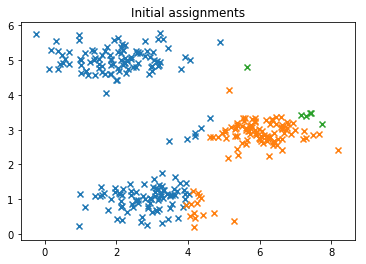

Cluster assignments for the first, second and third examples: [0 2 1]
Centroids after the 1st update:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


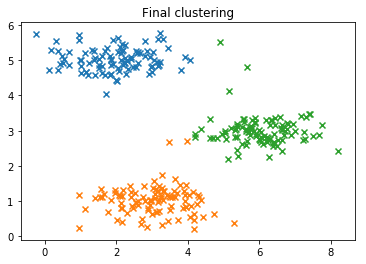

In [2]:
%run Parte1/main.py

Após 10 iterações do *K-means* já é possível identificar um agrupamento dos pontos por similaridade formando, assim, grupos circulares característicos desse algoritmo. 

## 1.4 *K-means* aplicado ao conjunto de dados de exemplo

Após implementar a função `find_closest_centroids`, que forma os grupos através da identificação do centróide mais próximo do ponto de exemplo, e a função `compute_centroids`, que recalcula os valores desses centróides com base nas novas atribuições do grupo, esta seção descreve a análise da implementação da função `run_kmeans`. Essa função é a responsável por efetivamente rodar o *K-means*. Logo, existem chamadas para as funções anteriores dentro de um número de iterações estabelecidas por parâmetro.

Outro parâmetro da função `run_kmeans` é o `plot_progress`. Ao definí-lo  como `True`, pode-se acompanhar a evolução de forma gráfica do *K-means* durante as 10 iterações. A análise dos gráficos indica que o algoritmo já converge na oitava iteração para os dados de exemplo, visto que os valores dos centróides permanecem inalterados. Pela implementação isso indica que o valor da variável `previous_centroids` é igual ao da `centroids` antes de plotar o gráfico.

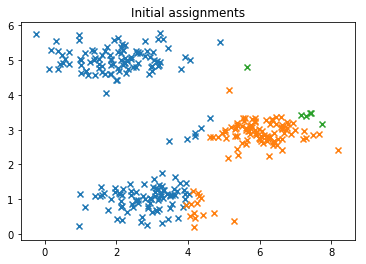

Cluster assignments for the first, second and third examples: [0 2 1]


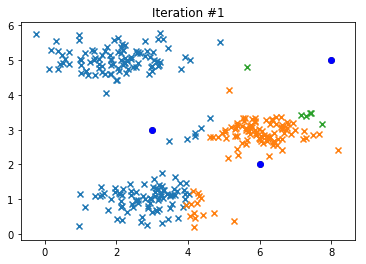

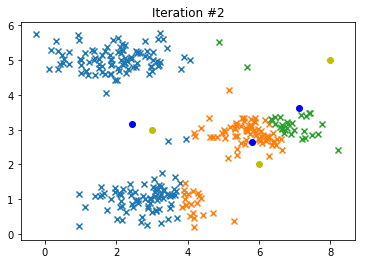

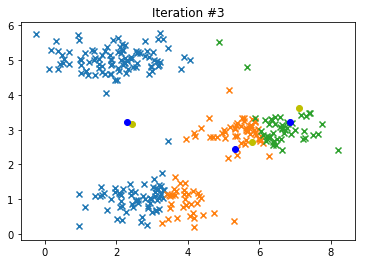

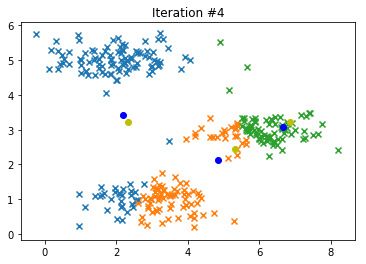

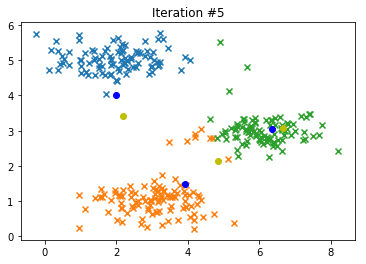

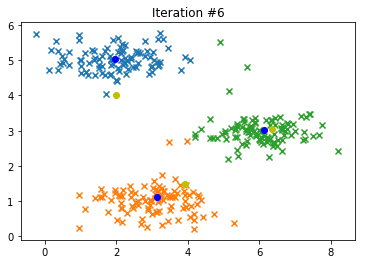

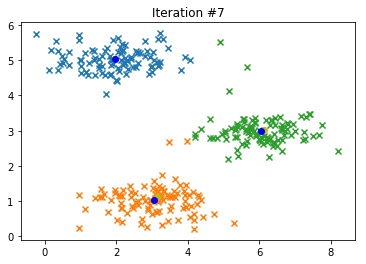

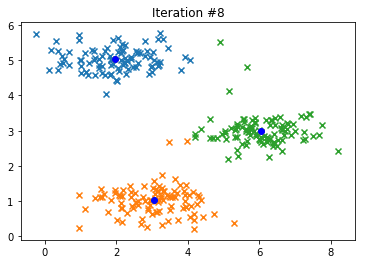

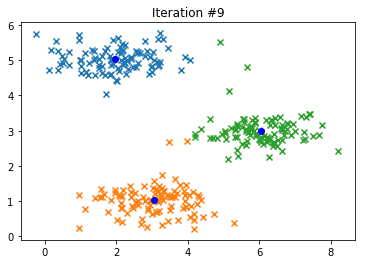

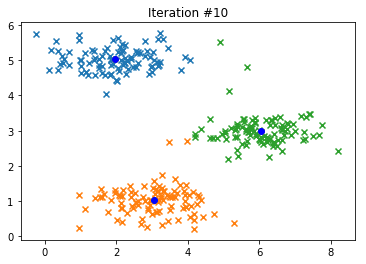

Centroids after the 1st update:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


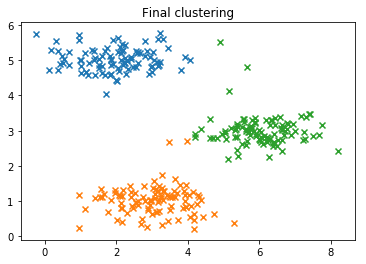

In [3]:
%run Parte1/main.py --plot-progress True

## 1.5 Inicialização aleatória

Uma boa estratégia de inicialização das sementes (centroides iniciais) é a utilização da inicialização aleatória. Desta maneira, é possível observar diferenças na convergência ao executar o *K-means*. Nesta etapa do trabalho é utilizada a função `kmeans_init_centroids` para selecionar aleatoriamente $k$ índices dos exemplos da matriz $X$, através da função do Numpy `random.choice`. E como está definido na função `raplace=False`, os exemplos gerados são garantidos se serem diferentes. 

Initial centroids:
 [[5.03611162 2.92486087]
 [5.63325403 2.99002339]
 [2.87961084 0.75413741]]


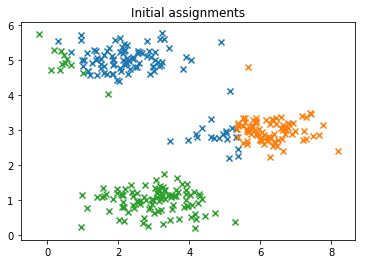

Cluster assignments for the first, second and third examples: [0 1 1]
Centroids after the 1st update:
[[1.95399466 5.02557006]
 [6.03366736 3.00052511]
 [3.04367119 1.01541041]]


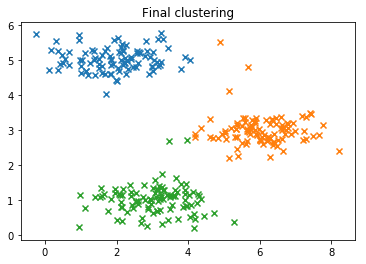

In [4]:
%run Parte1/main.py --random-init True

Ao analisar o gráfico "Initial assignments" desta seção, observá-se diferentes escolhas dos centróides cada vez que o *K-means* é executado, o que implica em diferentes formações de grupos iniciais. Esse comportamento difere da execução do *K-means* nas seções anteriores, que mantêm a mesma formação de grupos visto que a escolha das sementes estava fixa. 

# 2 Redução de Dimensionalidade

Análise de Componentes Principais (*Principal Component Analysis* - PCA) é um método que usa conceitos de algebra linear e estatística para calcular a projeção dos dados originais em uma dimensão menor. Sua aplicação visa diminuir a complexidade do modelo de aprendizagem de máquina com a redução de features. As próximas seções visam detalhar a execução da redução de dimensionalidade com PCA.

##  2.1 Conjunto de dados de exemplo

Para compreender melhor o funcionamento do método, o objetivo é aplicar o PCA para reduzir dados de 2D para 1D. A visualização do conjunto de dados de exemplo original, antes da aplicação do PCA, é ilustrada abaixo.

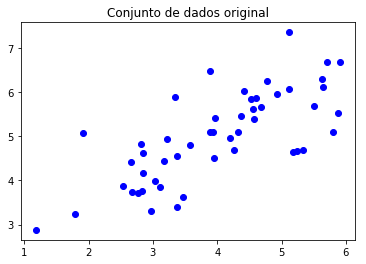

In [5]:
%run Parte2/main.py --only-first-plot True

## 2.2 Implementando o PCA

A implementação do PCA segue os seguintes passos nos dados de treinamento:
- Normalização das *features*
- Cálculo da matriz de covariância
- Decomposição da matriz de covariância pela técnica SVD

Logo, depois de garantir que os dados estão normalizados, eles são passam pela decomposição por valores singulares (*Singular Values Decomposition* - SVD) da matriz de covariância ($\Sigma$). Em mais detalhes, a técnica SVD decompõem $\Sigma$ em $U$, $S$ e $V$, onde $U$ é a matriz que contém os componentes principais, e $S$ é uma matriz diagonal, ambas matrizes $nxn$, visto que $\Sigma_{nxn}$.

Na implementação em Python, para o cálculo da matriz de covariância usa-se o produto escalar da matriz $X$, que contém os dados de treinamento, por ela mesma, e após, a divisão pelo $m$ número de exemplos. Outra alternativa é usar a função `cov` da biblioteca Numpy. Em seguida, aplica-se a técnica SVD com a função da biblioteca Numpy `linalg.svd`. Esse algoritmo está implementado na função `pca`.

## 2.3 Redução de Dimensionalidade com PCA

Depois de computar os componentes principais, eles são utilizados para reduzir a dimensão do conjunto de dados, projetando cada exemplo para um espaço de dimensão menor, que nesta parte do trabalho é de 2D $\to$ 1D.

### 2.3.1 Projetando os dados nos componentes principais

A função `project_data` é responsável por calcular a representação de dados reduzida de acordo com o número $K$ de dimensões desejadas.  Isso é feito ao projetar ortogonalmente cada exemplo da matriz $X$ para os $K$ autovetores (componente principais) de $U$. Essa função retorna a matriz projetada $Z$.

In [6]:
%run Parte2/main.py --no-plot True

print('Projeção do primeiro exemplo de X = %0.3f.'%float(Z[0]))

Projeção do primeiro exemplo de X = 1.496.


### 2.3.2 Reconstruindo uma aproximação dos dados

Após projetar os dados de exemplos da matriz $X$, conforme mostrado da seção anterior, existe a possibilidade de recuperar os dados, projetando-os novamente para o dimensão original. A função `recover_data` projeta a matriz $Z$, resultado da redução de dimensionalidade da matriz $X$, para o espaço original e retorna a aproximação recuperada na matriz `X_rec`.

In [7]:
%run Parte2/main.py --no-plot True

print('Aproximação recuperada do primeiro exemplo de X = ', X_rec[0])

Aproximação recuperada do primeiro exemplo de X =  [-1.05805279 -1.05805279]


### 2.3.3 Visualizando as projeções

Abaixo é possível visualizar no primeiro gráfico os pontos de dados originais e os autovetores em destaque que formam os novos eixos de coordenadas. Os autovetores (componentes principais) retornados pela matriz $U$ determinam as direções do novo espaço de característica, e os autovalores, retornados pela matriz diagonal $S$ determinam sua magnitude. O segundo gráfico explica a variância dos dados ao longo dos novos eixos, baseado nos autovalores de $S$.

Após aplicação do método PCA são visualizados, no terceiro gráfico, tanto os dados originais quanto os pontos projetados.

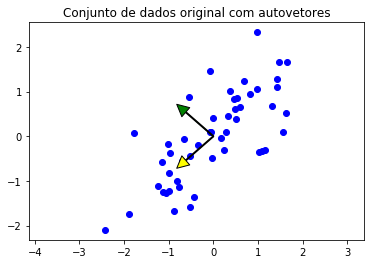

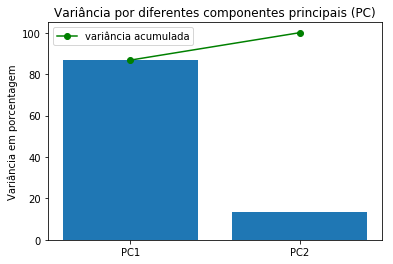

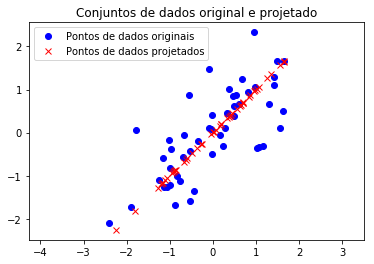

In [8]:
%run Parte2/main.py

Conclui-se pelo último gráfico que os dados são projetados no eixo indicado pelo autovetor amarelo, exibido no primeiro gráfico, pois apresenta maior variância e, consequentemente, menor perda de dados originais. 

# 3 Detecção de Anomalias

Esta última parte do trabalho tem como objetivo detectar anomalias nos comportamentos de servidores de um *data center*. Para obter uma intuição melhor do problema, abaixo, apresenta-se um gráfico com os dados de latência e vazão dos servidores.  

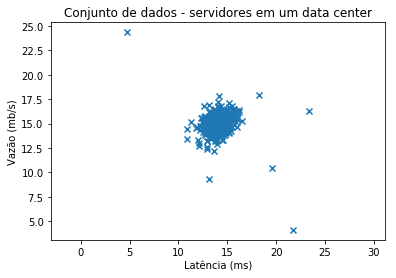

In [9]:
%run Parte3/main.py --only-first-plot True

Parece que há um agrupamento bem centralizado com alguns valores mais distantes, que podem ser considerados anomalias. Para confirmar esse análise, a tarefa é ajustar uma distribuição gaussiana (normal) para cada uma das características.

## 3.1 Distribuição Gaussiana


Para a construção do modelo $p(x)$, toma-se como entrada o conjunto de treinamento, que nesse caso são os exemplos de latência e vazão dos servidores do *data center*, e presumi-se que cada característica segue uma distribuição gaussiana. Então, esse modelo será uma aproximação da distribuição de probabilidade gaussiana univariada. Univariado porque é feita a estimativa da distruibuição normal para cada uma das características do conjunto de treinamento separadamente. Os parâmetros da distribuição são a média ($\mu$) e variância ($\sigma^2$), que serão estimados na próxima seção.

## 3.2 Estimativa de parâmetros para uma gaussiana

A função `estimate_gaussian_params` toma como entrada a matriz de dados $X$ e produz um vetor $mu$ de dimensão $n$ que contém a média de todas as $n$ caracteristicas e outro vetor $sigma2$ de dimensão $n$ que contém as variâncias de todas as características. Para não separar o cálculo da média e da variância de cada característica, e assim fazer uso da técnica de vetorização, é informado em que eixo as operações matemáticas devem ser realizadas (`axis=0`). Sem esse parâmetro, as operações seriam realizadas para toda a matriz $X$, e o resultado seria somente dois escalares, um para a média e outro para variância.

mu: [14.11222578 14.99771051]
variance: [1.83263141 1.70974533]
 


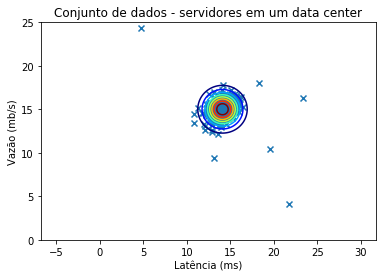

In [10]:
%run Parte3/main.py --only-second-plot True

Os primeiros valores de $mu$ e $variance$ apresentados acima são referentes à primeira caracteristica $x_1$, no caso a latência, e os valores seguintes, à vazão, $x_2$. Através do gráfico acima observa-se que valores de $(x_1,x_2)$ fora dos contornos correspondem a baixas probabilidades, logo, prováveis pontos de anomalias. 

## 3.3 Selecionando $\epsilon$

Com os parâmetros de modelo definido, é necessário determinar um limite de probabilidade que indique que um exemplo deve ser considerado uma anomalia. Para fazer isso, precisa-se de um conjunto de dados de validação rotulados, ou seja, em que as anomalias verdadeiras foram marcadas como tal. E para testar o desempenho do modelo na identificação dessas anomalias, são considerados valores de limite diferentes. Assim, um limite $\epsilon$ é definido para determinar quais exemplos são anomalias. Se um exemplo $x$ tiver uma baixa probabilidade $p(x) < \epsilon$, então $x$ é considerado uma anomalia. 

A função `select_epsilon` deve encontrar o melhor valor do limite $\epsilon$ e retornar dois valores: o primeiro é o valor escolhido para $\epsilon$, o segundo, o escore $F1$, que indica o quão bem o modelo está realizando a tarefa de encontrar as anomalias verdadeiras. O escore $F1$ é calculado baseado nas medidas de precisão e revocação.

(307,)
step size: 8.990852779269493e-05
Best value found for epsilon: 8.990852779269493e-05
 


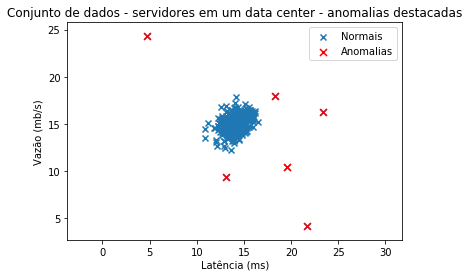

In [11]:
%run Parte3/main.py

O gráfico acima confirma as suposições feitas na seção anterior, sinalizando todos os pontos com baixa probabilidade de ocorrência como anomalias.